In [26]:
# import numpy as np
# import random

# def interpolate_2d(q, closest_neighbour, step=0.01):
#     dist = np.linalg.norm(q - closest_neighbour)
#     steps = int(dist / step)
#     return np.linspace(q, closest_neighbour, steps)

# def RRT_build(q_0, q_goal, n):
#     V = []
#     V.append(q_0)
#     E = []
#     bounds = [-2.275,2.275,-2.525,2.025] # min_x, max_x, min_y, max_y
#     q = []
#     distance = []
    
#     for i in range(n):
#         q = np.array([random.uniform(bounds[0], bounds[1]), random.uniform(bounds[2], bounds[3])])

#         while check_collision(q):
#             q = np.array([random.uniform(bounds[0], bounds[1]), random.uniform(bounds[2], bounds[3])])

#         distance = []
#         for i in range(len(V)):
#             distance.append(np.linalg.norm(q - V[i]))
        
#         closest_neighbour = V[(np.argmin(distance))]
#         interpolated=interpolate_2d(q,closest_neighbour)

#         collision_free = True
#         for point in interpolated:
#             if check_collision(point):
#                 collision_free = False
#                 break
        
#         if collision_free:
#             E.append([q, closest_neighbour])
#             V.append(q)

#         interpolated_goal=interpolate_2d(q,g_goal)

#         collision_free = True
#         for point in interpolated_goal:
#             if check_collision(point):
#                 collision_free = False
#                 break
        
#         if collision_free:
#             E.append([q, q_goal])

#     return V, E

# def find_RRT_path(E, q_0):
#     path = [E[-1][1], E[-1][0]]

#     while True:
#         found = False
#         for edge in E:
#             if np.array_equal(edge[1], path[-1]):
#                 path.append(edge[0])
#                 found = True
#                 break
#         if not found or path[-1] == q_0:
#             break

#     path.reverse()
#     return path

Stop, Goal is reached!
[array([0., 0.]), array([-2.1690585 , -0.64011456]), array([-1.2269659 , -2.17468677]), array([ 1.35935447, -2.33405228]), array([2., 2.])]


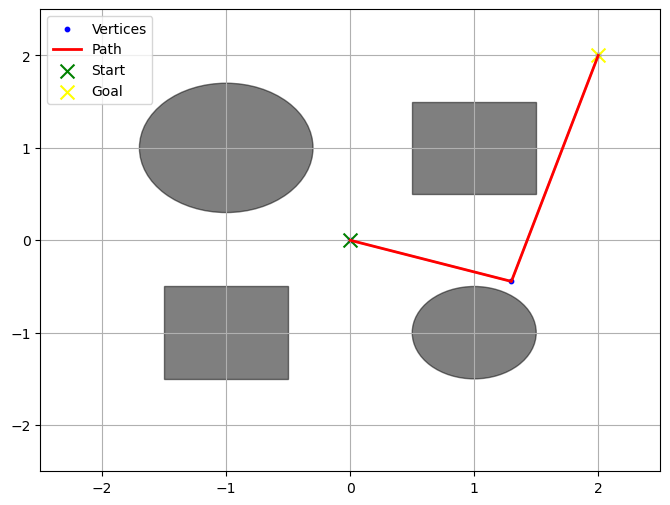

In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Obstacles
obstacles_rect = [  # Rectangular obstacles: [x_min, y_min, width, height]
    [-1.5, -1.5, 1.0, 1.0],
    [0.5, 0.5, 1.0, 1.0]
]

obstacles_circle = [  # Circular obstacles: [x_center, y_center, radius]
    [1.0, -1.0, 0.5],
    [-1.0, 1.0, 0.7]
]

# Function to interpolate between two points
def interpolate_2d(q, closest_neighbour, step=0.01):
    dist = np.linalg.norm(q - closest_neighbour)
    steps = int(dist / step)
    return np.linspace(q, closest_neighbour, steps)

# Function to check if a point is in collision with any obstacle
def check_collision(q):
    x, y = q
    # Rectangular obstacles
    for rect in obstacles_rect:
        x_min, y_min, width, height = rect
        if x_min <= x <= x_min + width and y_min <= y <= y_min + height:
            return True

    # Circular obstacles
    for circle in obstacles_circle:
        x_c, y_c, r = circle
        if np.sqrt((x - x_c) ** 2 + (y - y_c) ** 2) <= r:
            return True

    return False

# RRT (Rapidly-exploring Random Tree) construction function
def RRT_build(q_0, q_goal, n):
    V = [q_0]  # List of vertices (nodes)
    E = []  # List of edges (connections between nodes)
    bounds = [-2.275, 2.275, -2.525, 2.025]  # Bounds for random sampling
    goal_reached = False
    
    for _ in range(n):
        if goal_reached:  # If the goal is reached, exit the loop
            break
        
        q = np.array([random.uniform(bounds[0], bounds[1]), random.uniform(bounds[2], bounds[3])])

        # Keep sampling new points if they collide with an obstacle
        while check_collision(q):
            q = np.array([random.uniform(bounds[0], bounds[1]), random.uniform(bounds[2], bounds[3])])

        # Find the closest existing node in the tree
        distances = [np.linalg.norm(q - v) for v in V]
        closest_neighbour = V[np.argmin(distances)]

        # Interpolate between the new point and the closest neighbour
        interpolated = interpolate_2d(q, closest_neighbour)
        collision_free = all(not check_collision(point) for point in interpolated)

        # If the path is collision-free, add the point and edge to the tree
        if collision_free:
            V.append(q)
            E.append([q, closest_neighbour])

            # Check if the path to the goal is collision-free
            interpolated_goal = interpolate_2d(q, q_goal)
            collision_free_goal = all(not check_collision(point) for point in interpolated_goal)

            # If the path to the goal is also collision-free, add the goal and edge, then stop
            if collision_free_goal:
                E.append([q_goal, q])
                V.append(q_goal)
                print("Stop, Goal is reached!")
                print(path)
                goal_reached = True
                break

    return V, E

# Function to reconstruct the path from the tree
def find_RRT_path(E, q_0, q_goal):
    path = [q_goal, E[-1][1]]  # Start path with the goal
    while not np.allclose(path[-1], q_0, atol=1e-6):  # Loop until the start is reached
        for edge in E:
            if np.allclose(edge[0], path[-1], atol=1e-6):  # Find the edge leading to the last point in the path
                path.append(edge[1])  # Add the next point in the path
                break
    path.reverse()  # Reverse the path to go from start to goal
    return path

# Function to plot the RRT and the found path
def plot_RRT(V, E, path, q_0, q_goal):
    plt.figure(figsize=(8, 6))
    for edge in E:  # Plot all edges in the RRT
        plt.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], color='gray', alpha=0.6)

    V = np.array(V)
    plt.scatter(V[:, 0], V[:, 1], c='blue', s=10, label='Vertices')  # Plot all vertices

    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], color='red', linewidth=2, label='Path')  # Plot the path

    plt.scatter(q_0[0], q_0[1], c='green', marker='x', s=100, label='Start')  # Mark the start point
    plt.scatter(q_goal[0], q_goal[1], c='yellow', marker='x', s=100, label='Goal')  # Mark the goal point

    # Plot obstacles
    for rect in obstacles_rect:
        rectangle = plt.Rectangle((rect[0], rect[1]), rect[2], rect[3], color='black', alpha=0.5)
        plt.gca().add_patch(rectangle)

    for circle in obstacles_circle:
        circle_patch = plt.Circle((circle[0], circle[1]), circle[2], color='black', alpha=0.5)
        plt.gca().add_patch(circle_patch)

    plt.legend()
    plt.grid(True)
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.show()

# Define the start and goal positions
q_0 = np.array([0.0, 0.0])
q_goal = np.array([2.0, 2.0])
n = 500  # Number of iterations to build the RRT

# Build the RRT and find the path
V, E = RRT_build(q_0, q_goal, n)
path = find_RRT_path(E, q_0, q_goal)

# Plot the RRT and the found path
plot_RRT(V, E, path, q_0, q_goal)
